In [57]:
from datasets import load_dataset
import pandas as pd
import os
from utils.filemanagement import load_from_file,save_preprocessed_df_to_file
import matplotlib.pyplot as plt
from utils.filemanagement import ROOT_PATH

In [58]:
folder_path_data = r"preprocessed_data"
file_name_previous_data ="np_large_raw.csv"
file_name_data ="np_large_basic.csv"
read_from_file = True

file_path = os.path.join(ROOT_PATH,folder_path_data,"data",file_name_previous_data)
df = pd.read_csv(file_path,index_col=0,encoding="utf-8")

file_path_load = os.path.join(ROOT_PATH,folder_path_data,"data",file_name_data)
if read_from_file:
    df = pd.read_csv(file_path_load,index_col=0,encoding="utf-8")
#df_one = load_from_file(folder_path_data, file_name_data,index_col=0)

In [59]:
df['text'] = df['text'].str.replace(r'[^\w\s]+', '')

C:\Users\lotfi\AppData\Local\Temp\ipykernel_23736\2913396941.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace(r'[^\w\s]+', '')


In [60]:
df['date'] = pd.to_datetime(df['label'],format="%Y")#pd.to_datetime(df['label'])

In [61]:
#df = df.drop(['label',"partier"], axis=1)

In [62]:
df = df[df['text'].str.strip().astype(bool)]

In [63]:
file_path = os.path.join(ROOT_PATH,folder_path_data,"data",file_name_data)
if not read_from_file:
    df.to_csv(file_path,encoding="utf-8")

In [64]:
df.describe()

,label
count,386795.000000
mean,2010.553671
std,7.108579
min,1998.000000
25%,2004.000000
50%,2011.000000
75%,2017.000000
max,2022.000000


In [65]:
df.head()

,text,label,date
0,Hvis ingen har noe å innvende skal jeg etterko...,1998,1998-01-01
1,Fungerende president vil anmode sekretæren for...,1998,1998-01-01
2,Odelstinget skal foreta valg av presidenter og...,1998,1998-01-01
3,Jeg foreslår Gunnar Skaug,1998,1998-01-01
4,Gunnar Skaug er foreslått valgt til Odelstinge...,1998,1998-01-01


In [66]:
df

,text,label,date
0,Hvis ingen har noe å innvende skal jeg etterko...,1998,1998-01-01
1,Fungerende president vil anmode sekretæren for...,1998,1998-01-01
2,Odelstinget skal foreta valg av presidenter og...,1998,1998-01-01
3,Jeg foreslår Gunnar Skaug,1998,1998-01-01
4,Gunnar Skaug er foreslått valgt til Odelstinge...,1998,1998-01-01
...,...,...,...
386792,Debatten i sak nr 2 er omme,2022,2022-01-01
386793,Da går vi til votering over sakene på dagens kart,2022,2022-01-01
386794,Presidenten foreslår at redegjørelsen vedlegge...,2022,2022-01-01
386795,Sak nr 2 var interpellasjon,2022,2022-01-01


In [67]:
df.text.map(len).max()

70830

In [68]:
df.text.map(len).min()

2

In [69]:
import numpy as np
lengths = df["text"].str.len()
argmax = np.where(lengths == lengths.max())[0]
df.iloc[argmax]

,text,label,date
347520,Under debatten er det satt frem i alt 223 fors...,2020,2020-01-01


In [70]:
lengths = df["text"].str.len()
argmax = np.where(lengths == lengths.min())[0]
df.iloc[argmax]

,text,label,date
56,Ja,1998,1998-01-01
1923,Ja,1998,1998-01-01
2716,Ja,1998,1998-01-01
2966,Ja,1998,1998-01-01
4327,Ja,1999,1999-01-01
...,...,...,...
381754,Ja,2022,2022-01-01
386044,Ja,2022,2022-01-01
386045,Ok,2022,2022-01-01
386296,Ja,2022,2022-01-01


In [71]:
df['date'].unique()

array(['1998-01-01T00:00:00.000000000', '1999-01-01T00:00:00.000000000',
       '2000-01-01T00:00:00.000000000', '2001-01-01T00:00:00.000000000',
       '2002-01-01T00:00:00.000000000', '2003-01-01T00:00:00.000000000',
       '2004-01-01T00:00:00.000000000', '2005-01-01T00:00:00.000000000',
       '2006-01-01T00:00:00.000000000', '2007-01-01T00:00:00.000000000',
       '2008-01-01T00:00:00.000000000', '2009-01-01T00:00:00.000000000',
       '2010-01-01T00:00:00.000000000', '2011-01-01T00:00:00.000000000',
       '2012-01-01T00:00:00.000000000', '2013-01-01T00:00:00.000000000',
       '2014-01-01T00:00:00.000000000', '2015-01-01T00:00:00.000000000',
       '2016-01-01T00:00:00.000000000', '2017-01-01T00:00:00.000000000',
       '2018-01-01T00:00:00.000000000', '2019-01-01T00:00:00.000000000',
       '2020-01-01T00:00:00.000000000', '2021-01-01T00:00:00.000000000',
       '2022-01-01T00:00:00.000000000'], dtype='datetime64[ns]')

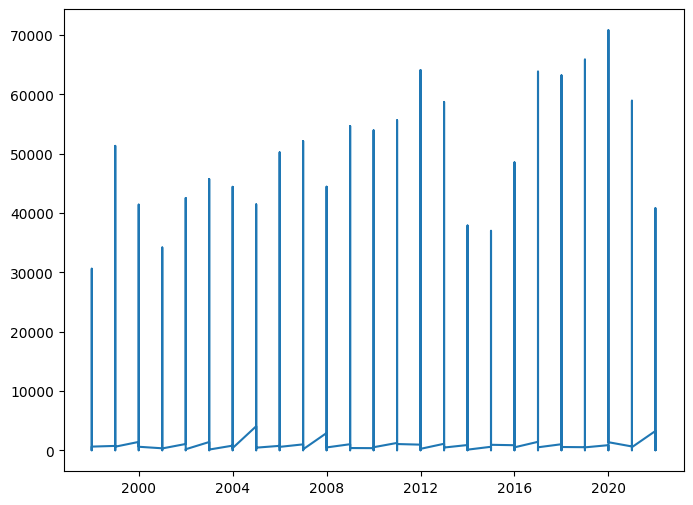

In [72]:
data = df["text"].str.len()

fig,ax = plt.subplots(figsize=(8,6))
ax.plot(df['date'],data)

df['date'] =pd.to_datetime(df['date'])

In [73]:
df.date

0        1998-01-01
1        1998-01-01
2        1998-01-01
3        1998-01-01
4        1998-01-01
            ...    
386792   2022-01-01
386793   2022-01-01
386794   2022-01-01
386795   2022-01-01
386796   2022-01-01
Name: date, Length: 386795, dtype: datetime64[ns]

In [74]:
vocab = set()
df['text'].str.lower().str.split().apply(vocab.update)
print(f"Length of vocab: {len(vocab)}")

Length of vocab: 524092


In [75]:
print(list(vocab)[0:1000])

['reguleringsbestemmelsene', 'investeringsmotiver', 'avlusingsmiddel', 'diagnosemessig', 'meningsytringa', 'oljearbeidsplass', 'tregitter', 'bensinstasjonskonsept', 'arbeidstilsynsinspektører', 'korrupsjonsbekjempelse', 'uslitelig', 'reknetykket', 'sanneleg', 'forvaltingsdomstol', 'høires', 'markedsbestemt', 'småkraftproduksjonen', 'refusjonsutbetalingene', 'janeiperspektivet', 'kontrollsiden', 'pst100', 'maksimaltid', 'snøhvitkontrakten', 'forbruksstatistikk', 'distriktsdifferensieringen', 'teknologidebatten', 'utdanningsstøttens', 'påny', 'makeskifteoppgjer', 'egenevalueringen', 'riksveiprosjekter', 'takstnemnd', 'rases', 'klesimport', 'normalskjenketid', 'molde4', 'forsikringsverksemdsloven', 'konkursstatistikken', 'næringsforeiningar', 'kjønnssjukdom', 'hyllesttalen', 'letthets', 'fellesutfordringer', 'suvereniteten', 'bistandsramme', 'togalternativene', 'forsøkte', 'rettsmedisin', 'rettighetshaverorganisasjonen', 'målestokkonkurranser', 'tomtas', 'vattenkraft', '199316', 'straffer

In [76]:
print(f"Max tokens: {df.text.map(len).max()}")

Max tokens: 70830


In [77]:
print(f"Min tokens: {df.text.map(len).min()}")

Min tokens: 2


In [78]:
r = list(df['text'])

In [79]:
res = 0
for item in r:
    res+= len(item)
print(f"Tokens in dataset: {res}")

Tokens in dataset: 509554172


In [80]:
#from nltk.classify.textcat import TextCat
#tc = TextCat()
#df['text'][0:100].apply(tc.guess_language)


KeyboardInterrupt



In [ ]:
from utils.dataset_stats import get_data_stats
from utils.filemanagement import write_dataset_stats



vocab_long = get_data_stats(df['text'])

#for item in vocab_long:
#    if item not in vocab:
#        print(item,"we failed here")

stats = get_data_stats(df['text'])
print(stats)

write_dataset_stats(folder_path_data,file_name_data,stats)